f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [34]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

In [29]:

#задаем интервал 
x = np.linspace(-20, 20, 1000)

In [37]:
# находим действительные корни
root = optimize.root(f, [-15])
root2 = optimize.root(f, [0])
root3 = optimize.root(f, [15])

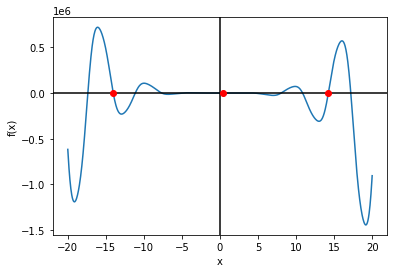

In [38]:
# строим график с обозначением корней на заданном интервале
plt.plot(x, f(x))
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(root.x, f(root.x), 'ro')
plt.plot(root2.x, f(root2.x), 'ro')
plt.plot(root3.x, f(root3.x), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

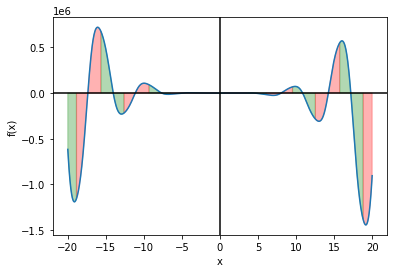

In [39]:



y = -12*x**4*np.sin(np.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

# Задаем производную
y_prime = -12*x**4*np.cos(np.cos(x))*np.sin(x) - 54*x**2 + 10*x + 10

# Строим график
plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Визуальное отображение областей возрастания и убывания функции
plt.fill_between(x, y, where=(y_prime > 0), color='green', alpha=0.3)
plt.fill_between(x, y, where=(y_prime < 0), color='red', alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [40]:
# Находим значения, в которых производная меняет знак
indices = np.where(np.diff(np.sign(y_prime)))[0]

# Находим соответствующие значения x
boundaries = x[indices]

print("интервал возрастания функции: [{:.2f}, {:.2f}]".format(boundaries[0], boundaries[1]))
print("интервал понижения функции: [{:.2f}, {:.2f}]".format(boundaries[1], boundaries[2]))

интервал возрастания функции: [-18.88, -15.68]
интервал понижения функции: [-15.68, -12.63]


In [41]:
#Находим экстремумы
res = minimize_scalar(f, bounds=[-20, 20], method='bounded')
min_x = res.x
min_y = res.fun


res = minimize_scalar(lambda x: -f(x), bounds=[-20, 20], method='bounded')
max_x = res.x
max_y = -res.fun

print("Minimum: x = {:.2f}, y = {:.2f}".format(min_x, min_y))
print("Maximum: x = {:.2f}, y = {:.2f}".format(max_x, max_y))

Minimum: x = 7.00, y = -25610.51
Maximum: x = -9.98, y = 107678.04


In [43]:
# Ищем значение при котором F(x) > 0
indices_gt_0 = np.where(y > 0)[0]


boundaries_gt_0 = x[indices_gt_0]

# Ищем значение при котором F(x) < 0
indices_lt_0 = np.where(y < 0)[0]


boundaries_lt_0 = x[indices_lt_0]

print("Интервал при котором f(x) > 0: [{:.2f}, {:.2f}]".format(boundaries_gt_0[0], boundaries_gt_0[-1]))
print("Интервал при котором f(x) < 0: [{:.2f}, {:.2f}]".format(boundaries_lt_0[0], boundaries_lt_0[-1]))

Интервал при котором f(x) > 0: [-17.36, 17.16]
Интервал при котором f(x) < 0: [-20.00, 20.00]


Для получения рассчетов справедлявых для других интервалов необходимо задать интересующий интервал в блоке "Задаем интервал" в начале блокнота, текущие рассчеты приведены для интервала от -20 до 20